In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense


In [15]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame = True)
df = data.frame
df.rename(columns = {'MedHouseVal':'Price'},inplace = True)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [17]:
X = df.drop('Price',axis = 1)
y = df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = Sequential([
    Dense(64,input_shape = (X_train.shape[1],),activation = 'relu'),
    Dense(32,activation = 'relu'),
    Dense(16,activation = 'relu'),
    Dense(1,activation = 'linear')
])


C:\Users\kolud\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(
    optimizer = Adam(0.001),
    loss = 'mse',
    metrics=['mae']
)


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss',patience = 5,restore_best_weights = True)

history = model.fit(X_train_scaled,y_train, validation_data = (X_test_scaled,y_test),epochs = 100,batch_size = 32,callbacks = [early_stop],verbose = 1)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.8287 - mae: 0.6134 - val_loss: 0.4248 - val_mae: 0.4503
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3838 - mae: 0.4400 - val_loss: 0.3901 - val_mae: 0.4329
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3535 - mae: 0.4213 - val_loss: 0.3507 - val_mae: 0.4189
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3356 - mae: 0.4080 - val_loss: 0.3372 - val_mae: 0.4080
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3227 - mae: 0.3986 - val_loss: 0.3185 - val_mae: 0.3945
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3099 - mae: 0.3882 - val_loss: 0.3202 - val_mae: 0.4030
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3061 - mae: 0.3846 - val_loss: 0.3087 - val_mae: 0.3801
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2998 - mae: 0.3789 - val_loss: 0.3025 - val_mae: 0.3771
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

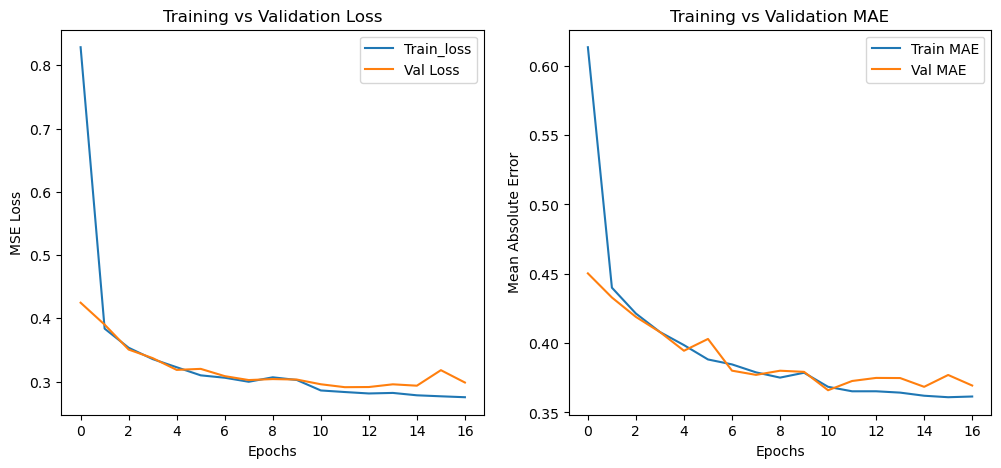

In [32]:
plt.figure(figsize= (12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'Train_loss')
plt.plot(history.history['val_loss'],label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training vs Validation MAE')
plt.legend()

plt.show()

In [33]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f" Test MSE: {test_loss:.3f}")
print(f" Test MAE: {test_mae:.3f}")

 Test MSE: 0.291
 Test MAE: 0.373


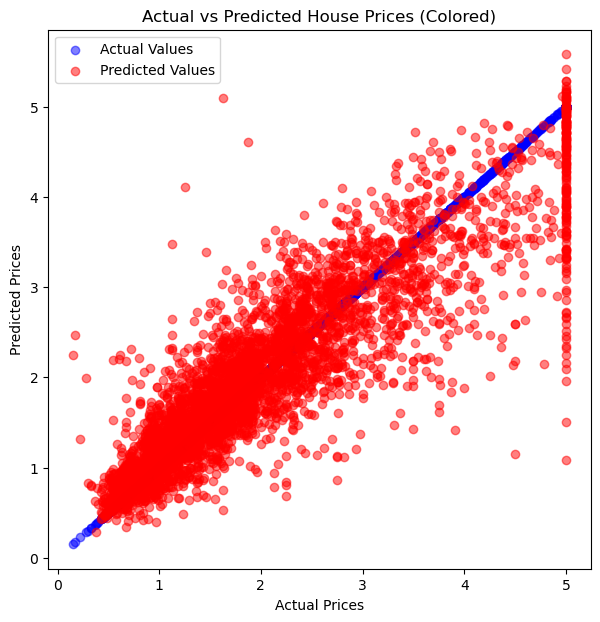

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))

# Actual values (x-axis) in BLUE
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label="Actual Values")

# Predicted values (y-axis) in RED
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label="Predicted Values")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Colored)")
plt.legend()
plt.show()


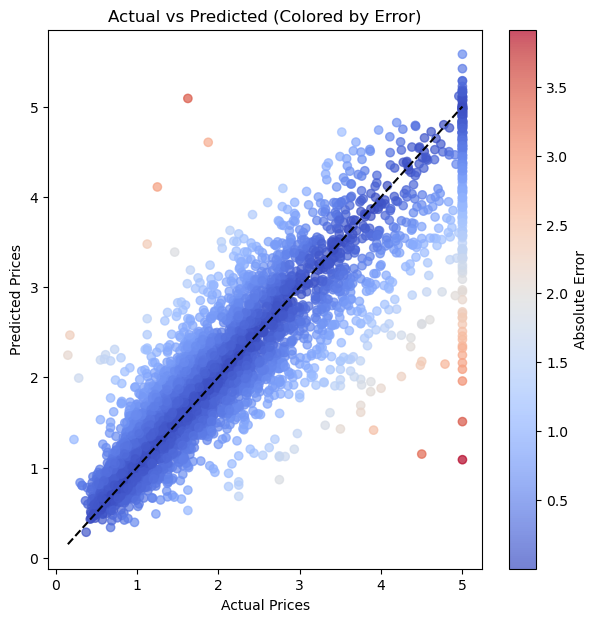

In [36]:
errors = abs(y_pred.flatten() - y_test.values)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm', alpha=0.7)
plt.colorbar(label="Absolute Error")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Colored by Error)")
plt.show()
